In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('creditcard.csv')

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,89630.0,0.030601,0.859108,0.290804,-0.591915,0.441892,-1.033405,1.016281,-0.190080,-0.066897,...,-0.251454,-0.537176,0.081516,-0.016869,-0.498699,0.142886,0.250215,0.097351,5.99,0
1,33404.0,1.042874,0.348936,-0.207597,2.215841,0.991928,1.349503,0.100767,0.451493,-0.739607,...,0.064860,0.193583,-0.007651,-1.379281,0.389286,0.225199,0.015614,-0.010651,15.16,0
2,57910.0,-1.549217,0.444995,1.953795,0.767481,1.249854,-0.439201,0.843048,0.145210,-1.561334,...,0.226098,0.136749,-0.178771,-0.013354,0.782533,-0.175391,-0.075909,0.058072,73.02,0
3,133413.0,-0.322340,0.969558,0.462259,-0.100560,-0.187871,-1.069206,0.454631,0.211302,-0.162835,...,0.164689,0.497732,-0.038204,0.420742,-0.191605,-0.333414,-0.032846,-0.010004,9.94,0
4,171524.0,1.990957,-1.984952,-1.014321,-1.265569,-1.371786,0.034195,-1.117904,0.061933,-0.828024,...,-0.416109,-0.844353,0.244993,0.716250,-0.264875,-0.387468,-0.015237,-0.036681,137.94,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2000 non-null   float64
 1   V1      2000 non-null   float64
 2   V2      2000 non-null   float64
 3   V3      2000 non-null   float64
 4   V4      2000 non-null   float64
 5   V5      2000 non-null   float64
 6   V6      2000 non-null   float64
 7   V7      2000 non-null   float64
 8   V8      2000 non-null   float64
 9   V9      2000 non-null   float64
 10  V10     2000 non-null   float64
 11  V11     2000 non-null   float64
 12  V12     2000 non-null   float64
 13  V13     2000 non-null   float64
 14  V14     2000 non-null   float64
 15  V15     2000 non-null   float64
 16  V16     2000 non-null   float64
 17  V17     2000 non-null   float64
 18  V18     2000 non-null   float64
 19  V19     2000 non-null   float64
 20  V20     2000 non-null   float64
 21  V21     2000 non-null   float64
 22  

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,96008.534500,-0.092652,0.023323,-0.069600,0.080397,-0.048574,-0.036741,-0.079963,0.011181,-0.053920,...,0.029790,-0.003444,0.007543,0.017984,-0.024654,0.005729,0.004633,0.004542,94.149330,0.013000
std,47467.551118,2.126852,1.749730,1.883331,1.561390,1.638294,1.407870,1.708478,1.509564,1.102616,...,0.935937,0.772702,0.692343,0.583407,0.524688,0.481970,0.404822,0.257332,264.500133,0.113302
min,153.000000,-26.457745,-16.443525,-30.177317,-4.088882,-25.791132,-10.136371,-31.197329,-37.353443,-9.462573,...,-8.755698,-8.887017,-15.981649,-2.348549,-3.536716,-1.500278,-7.263482,-3.398699,0.000000,0.000000
25%,55731.250000,-0.997641,-0.588604,-0.909770,-0.833604,-0.724435,-0.774805,-0.570687,-0.205048,-0.710381,...,-0.211483,-0.544496,-0.151844,-0.342298,-0.344980,-0.320109,-0.073793,-0.055370,6.550000,0.000000
50%,88330.500000,-0.076235,0.088314,0.170230,-0.019323,-0.073699,-0.292820,0.034161,0.027115,-0.063094,...,-0.015695,0.028866,-0.003261,0.040663,-0.024389,-0.056586,0.000203,0.012315,22.400000,0.000000
75%,139201.750000,1.307517,0.810513,1.051445,0.814907,0.579966,0.363228,0.568496,0.340965,0.582080,...,0.192613,0.550136,0.152062,0.442825,0.322955,0.264462,0.098318,0.085835,75.077500,0.000000
max,172751.000000,2.354761,16.497472,4.017561,11.190895,13.367253,16.246197,25.235195,14.955107,7.173635,...,27.202839,3.460893,9.143317,1.529283,1.771865,2.215986,3.307712,2.508443,5657.540000,1.000000


Text(0.5, 1.0, 'Time-Amount plot')

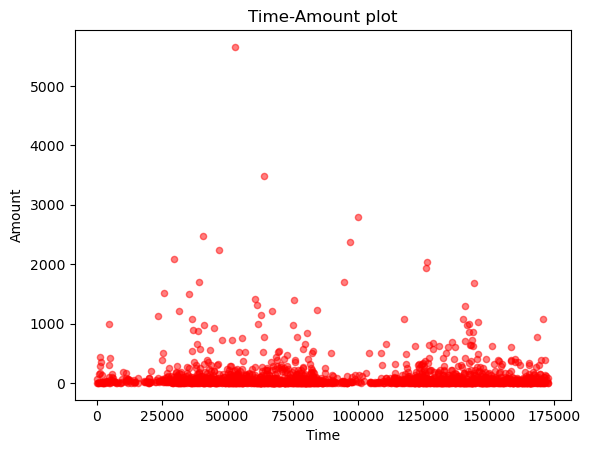

In [13]:
df.plot(kind='scatter', x='Time', y = 'Amount', alpha = 0.5, color='red')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Time-Amount plot')

In [15]:
df_new = pd.get_dummies(df, columns = ['Class', 'Time'], drop_first=True)

X = df_new.drop('V5', axis =1)
y = df_new.V5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR  # Changed from SVC to SVR for regression

# Use SVR (Support Vector Regression) instead of SVC for continuous target values
ml = SVR()

# Parameters for SVR - epsilon is an additional parameter for regression
para_grid = {'C': [1, 10, 100, 1000], 
             'gamma': [1, 0.1, 0.01, 0.001], 
             'kernel': ['rbf'],
             'epsilon': [0.1, 0.2, 0.5]}  # Added epsilon parameter for SVR

grid = GridSearchCV(ml, para_grid, refit=True, verbose=1, cv=5, n_jobs=-1)

grid_search = grid.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'C': 1000, 'epsilon': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}


In [21]:
accuracy = grid_search.best_score_
accuracy

0.6639717560869975

In [22]:
y_test_hat = grid.predict(X_test)

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_mat = confusion_matrix(y_test, y_test_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels=grid.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()

ValueError: continuous is not supported

In [ ]:
print(classification_report(y_test, y_test_hat))